In [21]:
import pandas as pd
from datetime import datetime

boe_price = pd.read_csv('BA Historical Prices.csv')
startDate = datetime.strptime('01/01/2017', '%m/%d/%Y')
endDate = datetime.strptime('08/01/2017', '%m/%d/%Y')

def convetFloat(x):
    x = x.replace(',','')
    try:
        return float(x)
    except:
        return None

boe_price['Date'] = boe_price['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
boe_price['Volume'] = boe_price['Volume'].apply(convetFloat)

boe_price = boe_price[boe_price.Date > startDate]
boe_price = boe_price[boe_price.Date < endDate]
print boe_price.head(5)
print len(boe_price)

Y = boe_price['Close'].values
dates = boe_price['Date'].values

dates = map(lambda x: datetime.utcfromtimestamp(x.astype(datetime)/1e9), dates)

          Date    Open    High     Low   Close      Volume
134 2017-07-31  241.85  246.49  241.82  242.46   5777021.0
135 2017-07-28  240.82  242.00  238.55  241.27   4602381.0
136 2017-07-27  237.13  242.68  236.70  241.00  10858711.0
137 2017-07-26  223.48  233.98  223.02  233.45  14135155.0
138 2017-07-25  213.22  214.00  211.95  212.46   2888194.0
151


In [5]:
# import tweets
# These tweets are relvant to Boeing Co., which is crawled by using Twitter API
# Link to download the data
import os, pickle
tweets_files = '/Volumes/anjie/tr.anjie/be_files/'
tweets_data = {}
days_ms = 8.64e+7
for file in os.listdir(tweets_files):
    with open(os.path.join(tweets_files,file)) as f:
        tmp = pickle.load(f)
        print file
        for tweet in tmp:
            tmp_date = datetime.fromtimestamp(float(tweet['timestamp_ms'])/1000.0)
            if tmp_date >= startDate and tmp_date <= endDate:
                tmp_date = tmp_date.replace(minute=0, hour=0, second=0, microsecond=0)
                tweets_data.setdefault(tmp_date, []).append(tweet)

2017-02-22_06-04-40_[0].json.gz.p
2017-01-29_16-25-22_[0].json.gz.p
2017-06-29_06-57-30_[0].json.gz.p
2017-06-18_17-07-05_[0].json.gz.p
2017-03-28_07-33-38_[0].json.gz.p
2017-06-09_01-58-24_[0].json.gz.p
2017-02-12_08-16-25_[0].json.gz.p
2017-05-26_11-25-49_[0].json.gz.p
2017-06-01_12-54-22_[0].json.gz.p
2017-07-05_13-42-15_[0].json.gz.p
2017-05-01_14-10-07_[0].json.gz.p
2017-03-10_02-07-55_[0].json.gz.p
2017-06-21_17-25-06_[0].json.gz.p
2017-06-25_22-44-24_[0].json.gz.p
2017-03-27_23-51-28_[0].json.gz.p
2017-06-28_17-17-32_[0].json.gz.p
2017-04-29_19-43-31_[0].json.gz.p
2017-01-04_22-03-25_[0].json.gz.p
2017-04-28_22-58-00_[0].json.gz.p
2017-04-12_19-43-01_[0].json.gz.p
2017-07-06_21-09-48_[0].json.gz.p
2017-08-03_13-09-25_[0].json.gz.p
2017-01-23_22-21-47_[0].json.gz.p
2017-07-24_23-11-49_[0].json.gz.p
2017-01-08_11-40-11_[0].json.gz.p
2017-03-15_16-32-55_[0].json.gz.p
2017-03-21_02-23-56_[0].json.gz.p
2017-07-02_19-03-44_[0].json.gz.p
2017-05-05_21-34-21_[0].json.gz.p
2017-02-06_12-

2017-03-11_05-09-17_[0].json.gz.p
2017-01-27_10-49-19_[0].json.gz.p
2017-06-13_14-22-53_[0].json.gz.p
2017-03-30_15-14-31_[0].json.gz.p
2017-01-23_09-56-37_[0].json.gz.p
2017-02-06_18-09-36_[0].json.gz.p
2017-01-08_17-06-49_[0].json.gz.p
2017-06-10_04-16-34_[0].json.gz.p
2017-03-02_14-01-28_[0].json.gz.p
2017-05-30_14-31-17_[0].json.gz.p
2017-05-06_16-41-31_[0].json.gz.p
2017-05-05_15-27-44_[0].json.gz.p
2017-07-11_23-19-30_[0].json.gz.p
2017-03-09_19-04-52_[0].json.gz.p
2017-06-13_00-55-27_[0].json.gz.p
2017-06-19_13-57-27_[0].json.gz.p
2017-07-11_04-00-57_[0].json.gz.p
2017-01-19_08-17-37_[0].json.gz.p
2017-04-18_16-25-05_[0].json.gz.p
2017-03-15_11-05-09_[0].json.gz.p
2017-06-05_07-18-29_[0].json.gz.p
2017-02-21_23-11-18_[0].json.gz.p
2017-04-10_05-33-08_[0].json.gz.p
2017-02-23_14-32-06_[0].json.gz.p
2017-01-27_15-58-08_[0].json.gz.p
2017-03-09_05-38-04_[0].json.gz.p
2017-01-27_22-22-30_[0].json.gz.p
2017-07-21_18-25-34_[0].json.gz.p
2017-07-10_15-22-39_[0].json.gz.p
2017-06-03_03-

2017-01-20_11-00-12_[0].json.gz.p
2017-06-04_12-42-16_[0].json.gz.p
2017-07-26_17-40-24_[0].json.gz.p
2017-04-17_06-10-05_[0].json.gz.p
2017-03-03_10-50-47_[0].json.gz.p
2017-06-22_19-31-47_[0].json.gz.p
2017-04-10_19-18-30_[0].json.gz.p
2017-04-07_07-54-02_[0].json.gz.p
2017-02-12_14-42-07_[0].json.gz.p
2017-04-09_01-20-20_[0].json.gz.p
2017-04-25_13-42-36_[0].json.gz.p
2017-03-25_09-31-39_[0].json.gz.p
2017-07-14_09-45-36_[0].json.gz.p
2017-05-10_22-20-09_[0].json.gz.p
2017-06-24_18-08-21_[0].json.gz.p
2017-01-26_01-55-02_[0].json.gz.p
2017-07-20_06-00-22_[0].json.gz.p
2017-06-30_09-33-09_[0].json.gz.p
2017-02-10_01-20-13_[0].json.gz.p
2017-02-28_01-13-44_[0].json.gz.p
2017-05-23_23-17-31_[0].json.gz.p
2017-05-18_19-38-26_[0].json.gz.p
2017-03-10_09-28-27_[0].json.gz.p
2017-07-08_05-44-23_[0].json.gz.p
2017-02-04_00-55-45_[0].json.gz.p
2017-08-01_01-52-26_[0].json.gz.p
2017-02-16_16-18-13_[0].json.gz.p
2017-06-09_21-35-31_[0].json.gz.p
2017-03-04_19-30-09_[0].json.gz.p
2017-06-26_05-

2017-04-03_06-30-04_[0].json.gz.p
2017-01-17_21-26-23_[0].json.gz.p
2017-08-03_06-13-08_[0].json.gz.p
2017-03-20_06-29-53_[0].json.gz.p
2017-05-14_17-28-16_[0].json.gz.p
2017-01-15_09-55-55_[0].json.gz.p
2017-05-15_07-53-53_[0].json.gz.p
2017-01-11_23-11-53_[0].json.gz.p
2017-01-18_17-54-46_[0].json.gz.p
2017-01-28_15-57-52_[0].json.gz.p
2017-01-01_19-40-33_[0].json.gz.p
2017-05-16_22-40-15_[0].json.gz.p
2017-06-12_04-37-25_[0].json.gz.p
2017-01-12_19-53-34_[0].json.gz.p
2017-08-02_23-30-49_[0].json.gz.p
2017-05-22_10-58-10_[0].json.gz.p
2017-07-15_11-59-34_[0].json.gz.p
2017-04-06_03-43-02_[0].json.gz.p
2017-01-07_08-39-40_[0].json.gz.p
2017-07-22_20-22-51_[0].json.gz.p
2017-06-22_06-55-05_[0].json.gz.p
2017-05-21_12-41-20_[0].json.gz.p
2017-05-23_16-50-19_[0].json.gz.p
2017-01-18_12-12-53_[0].json.gz.p
2017-02-23_00-50-52_[0].json.gz.p
2017-05-06_04-22-40_[0].json.gz.p
2017-01-03_13-22-02_[0].json.gz.p
2017-01-16_04-24-27_[0].json.gz.p
2017-02-25_13-49-37_[0].json.gz.p
2017-05-06_23-

In [10]:
print len(tweets_data)

212


In [24]:
# Simple Twitter sentiment analysis
import re
import sys
import json

def get_tweet_sentiment(tweet_dict, weights):
    score = 0.0
    text = ""
    if u'text' in tweet_dict:
        utf8_text = tweet_dict[u'text']
        text = utf8_text
        toks = re.split('\s+', utf8_text.lower())
        for word in toks:
            word = re.sub('\W', '', word)
            if word in weights:
                score += weights[word]
        score = min(6, score)
        score = max(-6, score)
        for word in toks:
            word = re.sub('\W', '', word)
            if word not in weights and len(word) > 3:
                weights[word] = 0

    return score, text

def readWeights():
    weights = {}
    with open('sentiments.txt') as f:
        for line in f:
            toks = re.split('\s+', line.strip().lower()) 
            if len(toks) == 2:
                word = toks[0]
                word = re.sub('\W', '', word)
                weights[word] = float(toks[1])
    return weights

weights = readWeights()

In [147]:
# generate feature for classification/regression
import numpy as np
tweets_vec = []

for d in dates:
    tws = tweets_data[d]
    vec = []
    
    num_ht = .0
    frac_ht = .0
    
    num_mentions = .0
    frac_mentions = .0
    
    num_URL = .0
    frac_URL = .0
    
    num_tweets = float(len(tws))
    sentiment_score = []
    for tw in tws:
        sentiment_score.append(get_tweet_sentiment(tw,weights)[0])
        
        num_ht += len(tw['entities']['hashtags'])
        if tw['entities']['hashtags']: frac_ht += 1
            
        num_mentions += len(tw['entities']['user_mentions'])
        if tw['entities']['user_mentions']: frac_mentions += 1
            
        num_URL += len(tw['entities']['urls'])
        if tw['entities']['urls']: frac_URL += 1
            
    frac_ht /= len(tw)
    frac_mentions /= len(tw)
    frac_URL /= len(tw)
    
#     vec.append(num_ht)
    vec.append(frac_ht)
#     vec.append(num_mentions)
    vec.append(frac_mentions)
#     vec.append(num_URL)
    vec.append(frac_URL)
    vec.append(num_tweets)
    

    hist,_ = np.histogram(sentiment_score, bins=3)
    vec.extend(hist.tolist())
    tweets_vec.append(vec)
    
    
X = np.array(tweets_vec)
from sklearn.preprocessing import normalize
X = normalize(X, axis=1)
print X.shape

(151, 7)


<a id='fig1'></a>
Figure 1

This figure is the data visualization of the data.
We constuct 7 contextual features from Beo relevant tweets over time: the number of tweets per day, the number of mention, sentiment scores, etc.
First, PCA is applied to obtain the most significant two components (i.e. x and y in the figure).
Then, the stock price together with x and y are plotted. 

In general, there seems a inclined plane in the 3D plot, which implies a lower x and a higher y can contribute a higher stock price. 
    

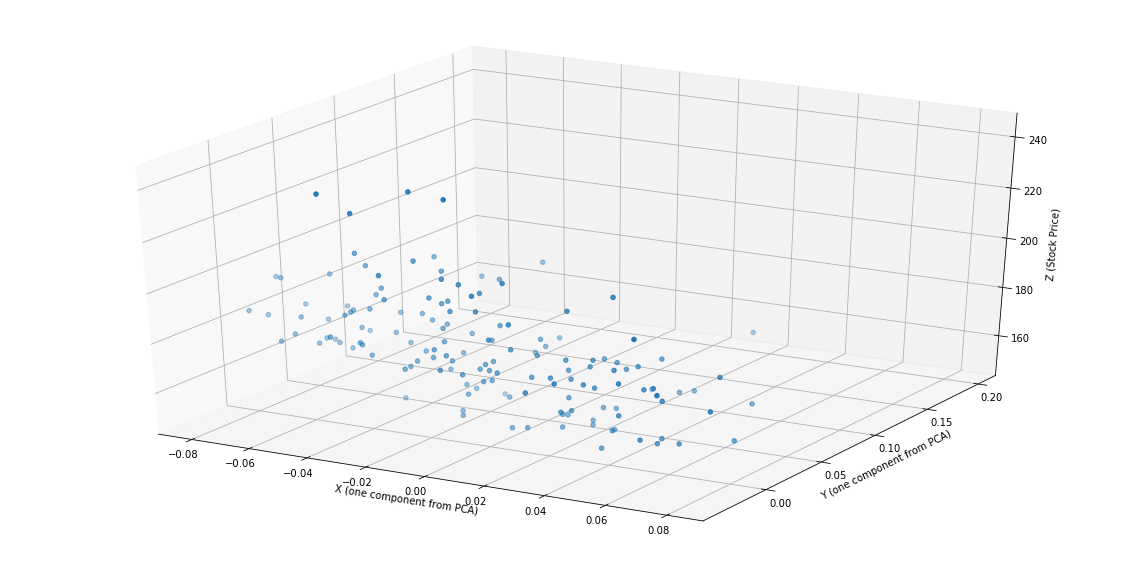

In [171]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_[:,0], X_[:,1], Y)

ax.set_xlabel('X (one component from PCA)')
ax.set_ylabel('Y (one component from PCA)')
ax.set_zlabel('Z (Stock Price)')

plt.show()

<a id='fig2'></a>
Figure 2

A linear model is applied using the 7 Twitter contextual features and the stock price day by day.
The figure lists the predicted and observed stock price by dots and each dot represents a day
The more the spot close to the line (y=x), the more accuarcy the preict is.

This linear model is not effective enough. However, 

[ -6.76369933e+03   2.63139425e+03  -3.50117246e+01  -4.58743086e+14
   4.58743086e+14   4.58743086e+14   4.58743086e+14]


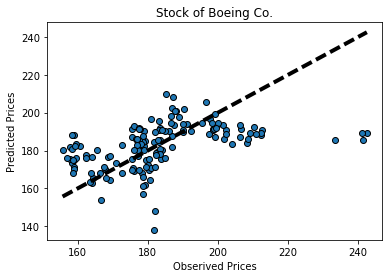

In [145]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr, X, Y, cv=10)

lr.fit(X,Y)
print lr.coef_

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Obserived Prices')
ax.set_ylabel('Predicted Prices')
plt.title('Stock of Boeing Co.')
plt.show()